# Ejercicios: Regresión Lineal Simple

In [ ]:
# Instala dependencias
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase10_BaseRegresionLinealSimple.sav
!pip install pingouin
!pip install pyreadstat

In [14]:
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import numpy as np

df = pd.read_spss("Clase10_BaseRegresionLinealSimple.sav")
df

,Participante,Horas_Internet,Impulsividad,Rendimiento,Uso_patológico_internet,Uso_problemático_celular,Juego_patológico
0,001,9.192585,14.016679,5.130105,29.979415,33.466436,51.629069
1,002,4.417330,15.308135,2.493590,7.798216,29.608270,58.572777
2,003,8.970391,9.383734,3.090073,79.417020,17.480083,7.207902
3,004,10.627142,17.714813,8.166904,77.924891,49.801048,68.254753
4,005,3.229547,15.691327,6.117007,24.903253,38.303082,34.883736
...,...,...,...,...,...,...,...
145,146,14.096435,4.020885,6.034401,74.495379,13.452317,21.921853
146,147,2.494416,7.473597,2.017906,20.563357,32.106987,29.550263
147,148,1.819807,14.073889,4.752853,12.366920,37.269633,50.269255
148,149,9.772035,4.109418,5.968890,84.842823,17.856490,74.436065


### Analiza las siguientes hipótesis de estudio:

HT1: El uso patológico de internet predice la cantidad de horas que los estudiantes navegan en internet.

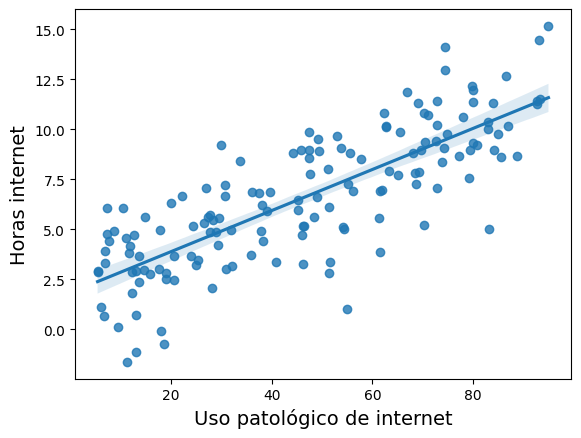

In [9]:
ax = sns.regplot(x="Uso_patológico_internet", y="Horas_Internet", data=df)
ax.set_xlabel("Uso patológico de internet", size=14)
ax.set_ylabel("Horas internet", size=14)
plt.show()

In [10]:
pg.normality(
    data=df[["Horas_Internet", "Uso_patológico_internet"]], method="shapiro"
)

,W,pval,normal
Horas_Internet,0.991445,0.504113,True
Uso_patológico_internet,0.947402,0.000020,False


In [12]:
pg.pairwise_corr(
    columns=["Horas_Internet", "Uso_patológico_internet"],
    method="spearman",
    alternative="two-sided",
    data=df,
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Horas_Internet,Uso_patológico_internet,spearman,two-sided,150,0.8028,"[0.74, 0.85]",4.710828e-35,1.0


In [6]:
model = smf.ols("Horas_Internet ~ Uso_patológico_internet", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Horas_Internet   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     253.2
Date:                Fri, 05 May 2023   Prob (F-statistic):           7.34e-34
Time:                        07:21:02   Log-Likelihood:                -319.89
No. Observations:                 150   AIC:                             643.8
Df Residuals:                     148   BIC:                             649.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.8312      0.343      5.339      0.000       1.153       2.509
Uso_patológico_internet     0.1027      0.006     15.912      0.000       0.090       0.115
==============================================================================
Omnibus:                        4.372   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                4.060
Skew:                          -0.400   Prob(JB):                        0.131
Kurtosis:                       3.103   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
error = np.sqrt(model.mse_resid)
print("Error estándar de la estimación:", error)

Error estándar de la estimación: 2.055250923789927


HT2: El uso problemático del celular disminuye el rendimiento académico (RA) de estudiantes de secundaria.

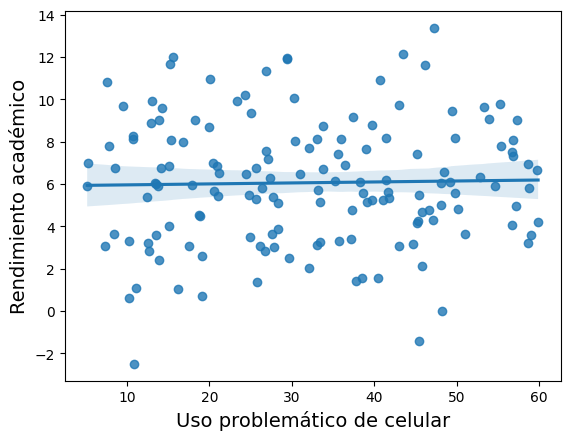

In [16]:
ax = sns.regplot(x="Uso_problemático_celular", y="Rendimiento", data=df)
ax.set_xlabel("Uso problemático de celular", size=14)
ax.set_ylabel("Rendimiento académico", size=14)
plt.show()

In [21]:
pg.normality(
    data=df[["Uso_problemático_celular", "Rendimiento"]], method="shapiro"
)

,W,pval,normal
Uso_problemático_celular,0.959132,0.000204,False
Rendimiento,0.994950,0.885963,True


In [20]:
pg.pairwise_corr(
    columns=["Uso_problemático_celular", "Rendimiento"],
    method="spearman",
    alternative="less",
    data=df,
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Uso_problemático_celular,Rendimiento,spearman,less,150,0.012223,"[-1.0, 0.15]",0.559007,0.036465


HT3: El juego patológico aumenta el nivel de impulsividad de estudiantes de secundaria.

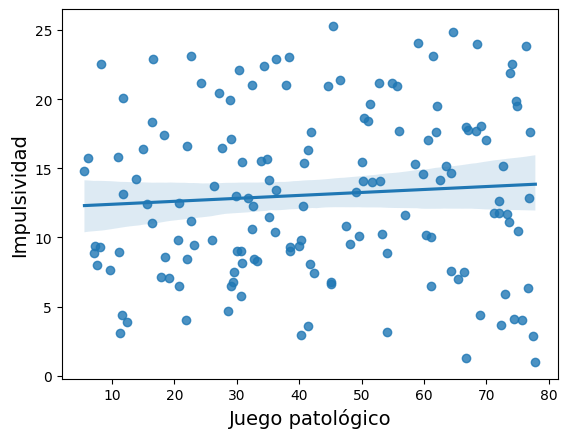

In [23]:
ax = sns.regplot(x="Juego_patológico", y="Impulsividad", data=df)
ax.set_xlabel("Juego patológico", size=14)
ax.set_ylabel("Impulsividad", size=14)
plt.show()

In [24]:
pg.normality(data=df[["Juego_patológico", "Impulsividad"]], method="shapiro")

,W,pval,normal
Juego_patológico,0.952121,0.000049,False
Impulsividad,0.974342,0.006577,False


In [25]:
pg.pairwise_corr(
    columns=["Juego_patológico", "Impulsividad"],
    method="spearman",
    alternative="greater",
    data=df,
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Juego_patológico,Impulsividad,spearman,greater,150,0.084397,"[-0.05, 1.0]",0.15225,0.269133


HT4: El uso problemático del celular aumenta la impulsividad reportada por estudiantes de secundaria.

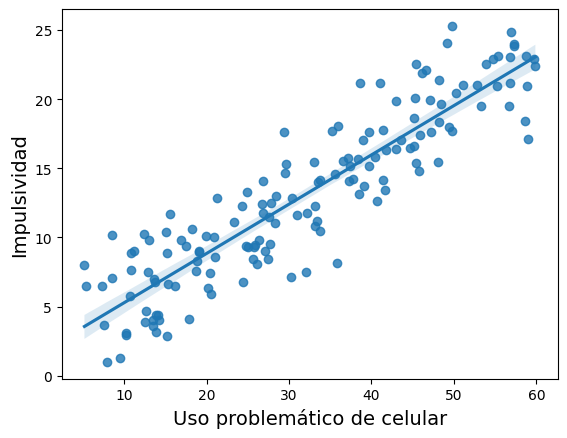

In [27]:
ax = sns.regplot(x="Uso_problemático_celular", y="Impulsividad", data=df)
ax.set_xlabel("Uso problemático de celular", size=14)
ax.set_ylabel("Impulsividad", size=14)
plt.show()

In [28]:
pg.normality(
    data=df[["Uso_problemático_celular", "Impulsividad"]], method="shapiro"
)

,W,pval,normal
Uso_problemático_celular,0.959132,0.000204,False
Impulsividad,0.974342,0.006577,False


In [30]:
pg.pairwise_corr(
    columns=["Uso_problemático_celular", "Impulsividad"],
    method="spearman",
    alternative="two-sided",
    data=df,
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Uso_problemático_celular,Impulsividad,spearman,two-sided,150,0.908391,"[0.88, 0.93]",6.458535e-58,1.0


In [33]:
model = smf.ols("Impulsividad ~ Uso_problemático_celular", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Impulsividad   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     671.3
Date:                Fri, 05 May 2023   Prob (F-statistic):           7.28e-57
Time:                        07:37:50   Log-Likelihood:                -353.21
No. Observations:                 150   AIC:                             710.4
Df Residuals:                     148   BIC:                             716.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.7114      0.487      3.514      0.001       0.749       2.674
Uso_problemático_celular     0.3565      0.014     25.910      0.000       0.329       0.384
==============================================================================
Omnibus:                        1.427   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                1.291
Skew:                           0.081   Prob(JB):                        0.524
Kurtosis:                       2.576   Cond. No.                         82.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
error = np.sqrt(model.mse_resid)
print("Error estándar de la estimación:", error)

Error estándar de la estimación: 2.5663286237124767


HT5: El juego patológico disminuye el rendimiento académico de estudiantes de secundaria. 

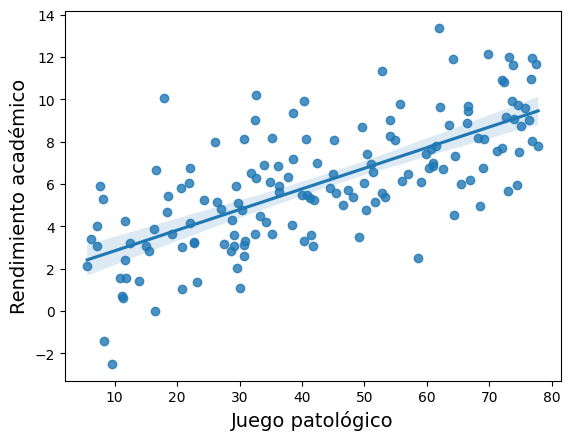

In [35]:
ax = sns.regplot(x="Juego_patológico", y="Rendimiento", data=df)
ax.set_xlabel("Juego patológico", size=14)
ax.set_ylabel("Rendimiento académico", size=14)
plt.show()

In [36]:
pg.normality(data=df[["Juego_patológico", "Rendimiento"]], method="shapiro")

,W,pval,normal
Juego_patológico,0.952121,0.000049,False
Rendimiento,0.994950,0.885963,True


In [38]:
pg.pairwise_corr(
    columns=["Juego_patológico", "Rendimiento"],
    method="spearman",
    alternative="less",
    data=df,
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Juego_patológico,Rendimiento,spearman,less,150,0.706497,"[-1.0, 0.77]",1.0,2.603741e-35


In [39]:
model = smf.ols("Rendimiento ~ Juego_patológico", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Rendimiento   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     142.7
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.89e-23
Time:                        07:40:34   Log-Likelihood:                -323.89
No. Observations:                 150   AIC:                             651.8
Df Residuals:                     148   BIC:                             657.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.8721      0.391      4.792      0.000       1.100       2.644
Juego_patológico     0.0974      0.008     11.944      0.000       0.081       0.114
==============================================================================
Omnibus:                        2.983   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.556
Skew:                           0.306   Prob(JB):                        0.279
Kurtosis:                       3.183   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
error = np.sqrt(model.mse_resid)
print("Error estándar de la estimación:", error)

Error estándar de la estimación: 2.110677533987612
